USING DATA ANALYSIS TO GENERATE INSIGHTS FOR MICROSOFT

1. Business Understanding 

Business Problem
The company Microsoft is in a pivotal season of their business where they would want to venture into creating original video content and they want exploratory data analysis done regarding content creation using the data sets provided. The company Microsoft has decided to create a movie studio for the same and want to develop a deeper understanding on creating movies through the guidance of the EDA. My task is to investigate which types of films are doing best at the box office and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. You are provided data about movie history ie the ratings, writers, directors, movie basics and what the movies are known for. 

Problem Statement 
You are tasked with exploring what type of films are currently doing the best at the box office and translating those findings into actionable insights that Microsoft can use to decide what type of films to create. 

Defining the Metric for Success
a) Data manipulation: It allows data scientists to preprocess, organize, and transform raw data into a more useful and structured format for analysis. It helps in extracting meaningful insights, identifying patterns, and preparing the data for further modeling, visualization, or statistical analysis.
b) Evolving business needs: As a data science project progresses, stakeholders may gain new insights or change their priorities, leading to alterations in the project's scope. For example, they might request additional analyses or require different metrics to be measured.
c)Analyze financial feasibility: Evaluate the financial viability of entering the movie space. Assess the potential return on investment (ROI) based on factors such as production costs, revenue streams and potential risks.

Understanding the Context 
This step is the process of understanding how data science affects the business of making original video content to gain as much information as possible for better business.

Data Relevance 
The relevance of data depends on the credibility and trustworthiness of the data source. Data from reputable and reliable sources are generally considered more relevant and trustworthy. By ensuring data relevance, data scientists can improve the accuracy and applicability of their analysis, leading to more reliable insights and informed decision-making.


2. Data Understanding 
is a critical step in the data science workflow that enables researchers and analysts to gain insights into the data, identify potential issues, and make informed decisions on data preprocessing.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_gross = pd.read_csv('Data\movies_gross.csv')
df_budgets = pd.read_csv('Data\movie_budgets.csv')

In [7]:
#investigate the data shape

df_gross.shape

(3387, 5)

In [8]:
#investigate the data shape
df_budgets.shape

(5782, 6)

In [9]:
#investigate the data types 
df_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [10]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [11]:
df_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [12]:
df_gross.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

Data Preparation 
also known as data preprocessing, is a crucial step in data science and involves transforming raw data into a clean, organized, and structured format suitable for analysis. It encompasses a series of operations and techniques applied to the data to address issues such as missing values, outliers, inconsistencies and formatting discrepancies. 

In [6]:
#Data integration, my list of df
list_of_dataframes = [df_budgets, df_gross ]
df = pd.concat(list_of_dataframes)

In [12]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1.0,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2.0,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN
2,3.0,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4.0,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN
4,5.0,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN


In [14]:
df.dtypes

id                   float64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
title                 object
studio                object
foreign_gross         object
year                 float64
dtype: object

In [9]:
#find missing values for the column production budget 
df['production_budget'].isna().sum()

3387

In [11]:
#drop missing values 
df['production_budget'].dropna()

0       $425,000,000 
1       $410,600,000 
2       $350,000,000 
3       $330,600,000 
4       $317,000,000 
            ...      
5777          $7,000 
5778          $6,000 
5779          $5,000 
5780          $1,400 
5781          $1,100 
Name: production_budget, Length: 5782, dtype: object

In [13]:
df.dropna(subset=['domestic_gross', 'worldwide_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1.0,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2.0,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN
2,3.0,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4.0,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN
4,5.0,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78.0,31-Dec-18,Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN
5778,79.0,2-Apr-99,Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN
5779,80.0,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN
5780,81.0,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN


In [17]:
#filter data on relevant columns 
relevant_columns = [
    "movie",
    "production_budget",
    "worldwide_gross",
    "domestic_gross"
]
df= df[relevant_columns]
df.shape

(9169, 4)

In [25]:
#remove commas from object column 
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
print(df['production_budget'])

0       425000000 
1       410600000 
2       350000000 
3       330600000 
4       317000000 
           ...    
3382           NaN
3383           NaN
3384           NaN
3385           NaN
3386           NaN
Name: production_budget, Length: 9169, dtype: object


In [44]:
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
print(df['worldwide_gross'])

0       2776345279.0
1       1045663875.0
2        149762350.0
3       1403013963.0
4       1316721747.0
            ...     
5777             0.0
5778        240495.0
5779          1338.0
5780             0.0
5781        181041.0
Name: worldwide_gross, Length: 5782, dtype: object


In [23]:
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
print(df['domestic_gross'])

0       760507625 
1       241063875 
2        42762350 
3       459005868 
4       620181382 
           ...    
3382           NaN
3383           NaN
3384           NaN
3385           NaN
3386           NaN
Name: domestic_gross, Length: 9169, dtype: object


In [40]:
#convert these columns to float
columns_to_convert = ["production_budget", "worldwide_gross", "domestic_gross"]
df[columns_to_convert] = df[columns_to_convert].astype(float)

print(df.dtypes)

movie                 object
production_budget    float64
worldwide_gross      float64
domestic_gross       float64
dtype: object


In [28]:
#drop rows with missing values
df = df.dropna(subset= ['production_budget'])
df['production_budget'].shape

(5782,)

In [31]:
df = df.dropna(subset= ['worldwide_gross'])
df['worldwide_gross'].shape

(5782,)

In [68]:
# Get the top 10 values from column production budget 
top_10_pro_budget = df['production_budget'].nlargest(10)
top_10_pro_budget

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
5    306000000.0
6    300000000.0
7    300000000.0
8    300000000.0
9    300000000.0
Name: production_budget, dtype: float64

In [60]:
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
print(df['worldwide_gross'].dtypes)


object


In [61]:
df['worldwide_gross'] = df['worldwide_gross'].str.replace('.', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('+', '')
df['worldwide_gross']

0       2776345279000
1       1045663875000
2        149762350000
3       1403013963000
4       1316721747000
            ...      
5777               00
5778        240495000
5779          1338000
5780               00
5781        181041000
Name: worldwide_gross, Length: 5782, dtype: object

In [63]:
# Convert column worldwide gross to float data type
df['worldwide_gross'] = df['worldwide_gross'].astype(float)

print(df['worldwide_gross'])

0       2.776345e+12
1       1.045664e+12
2       1.497624e+11
3       1.403014e+12
4       1.316722e+12
            ...     
5777    0.000000e+00
5778    2.404950e+08
5779    1.338000e+06
5780    0.000000e+00
5781    1.810410e+08
Name: worldwide_gross, Length: 5782, dtype: float64


In [69]:
top_10_world_gross = df['worldwide_gross'].nlargest(10)
top_10_world_gross

0      2.776345e+12
42     2.208208e+12
5      2.053311e+12
6      2.048134e+12
33     1.648855e+12
66     1.518723e+12
26     1.517936e+12
3      1.403014e+12
41     1.348258e+12
260    1.341693e+12
Name: worldwide_gross, dtype: float64

In [70]:
top_10_dom_gross = df['domestic_gross'].nlargest(10)
top_10_dom_gross

5     936662225.0
0     760507625.0
41    700059566.0
6     678815482.0
42    659363944.0
33    652270625.0
26    623279547.0
4     620181382.0
43    608581744.0
74    533720947.0
Name: domestic_gross, dtype: float64

In [77]:
df.columns

Index(['movie', 'production_budget', 'worldwide_gross', 'domestic_gross'], dtype='object')

In [85]:

# Create an empty list
result_list = []

# Iterate over DataFrame rows and append values from column 'movie'
for _, row in df.iterrows():
    result_list.append(row['movie'])

print(result_list)


['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Dark Phoenix', 'Avengers: Age of Ultron', 'Star Wars Ep. VIII: The Last Jedi', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Pirates of the Caribbean: At Worldâ\x80\x99s End', 'Justice League', 'Spectre', 'The Dark Knight Rises', 'Solo: A Star Wars Story', 'The Lone Ranger', 'John Carter', 'Tangled', 'Spider-Man 3', 'Captain America: Civil War', 'Batman v Superman: Dawn of Justice', 'The Hobbit: An Unexpected Journey', 'Harry Potter and the Half-Blood Prince', 'The Hobbit: The Desolation of Smaug', 'The Hobbit: The Battle of the Five Armies', 'The Fate of the Furious', 'Superman Returns', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'Quantum of Solace', 'The Avengers', 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Amazing Spider-Man', 'Battleship', 'Transformers: The Last Knight', 'Jurassic World', 'Men in Black 3', 'Transformer

In [ ]:
#df['worldwide_gross'] = df['worldwide_gross']*
#df['worldwide_gross']

Data Visualization plays a crucial role in data science as it helps in understanding and communicating insights from data effectively. Here are some of my data visualization techniques

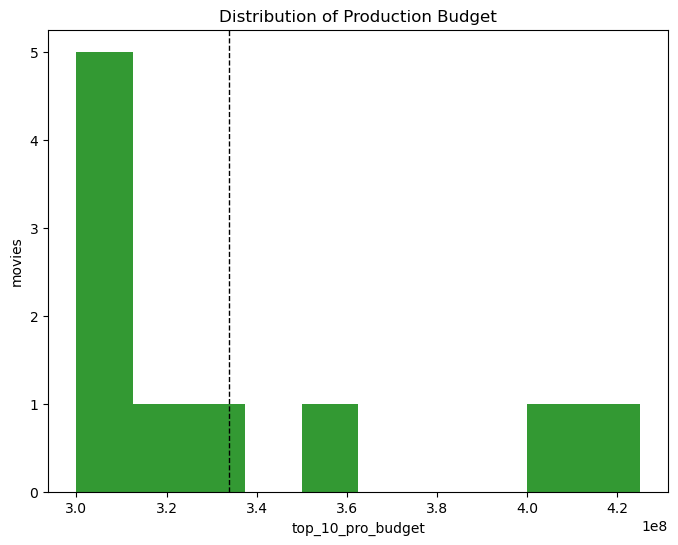

In [86]:
top_10_pro_budget = df['production_budget'].nlargest(10)
mean_pro_budget = top_10_pro_budget.mean()
movies = result_list

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(top_10_pro_budget, bins=10, alpha=0.8, color='green')
ax.axvline(mean_pro_budget, color='black', linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Production Budget')
ax.set_xlabel('top_10_pro_budget')
ax.set_ylabel('movies')
plt.show()